# <i>Supervised Learning</i> 

# Tutorial Logistic Regresion
The Binary Classification, problem in which $y$ can take on only two values, 0 and 1. (Most of what we say here will also generalize to the multiple-class case.) For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some features of a piece of email, and y may be 1 if it is a piece of spam mail, and 0 otherwise. 0 is also called the negative class, and 1 the positive class. Given $x^{(i)}$, the corresponding $y^{(i)}$ is also called the label or target for the training example.



Previously we learned how to predict continuous-valued quantities (e.g., generated data using linear equation) as a linear function of input values.  Sometimes we will instead wish to predict a discrete variable such as predicting whether a grid of pixel intensities represents a “0” digit or a “1” digit. This is a classification problem. Logistic regression is a simple classification algorithm for learning to make such decisions.

In linear regression we tried to predict the value of $y^{(i)}$ for the $i$‘th example $x^{(i)}$ using a linear function $y = h_\theta(x) = \theta^\top x$. This is clearly not a great solution for predicting binary-valued labels $\left(y^{(i)} \in \{0,1\}\right)$. In logistic regression we use a different hypothesis class to try to predict the probability that a given example belongs to the “1” class versus the probability that it belongs to the “0” class.  Let’s change the form for our hypotheses $h_\theta(x)$. We will choose:


$$P(y=1|x) = h_\theta(x) = \frac{1}{1 + \exp(-\theta^\top x)} \equiv \sigma(\theta^\top x)\\
P(y=0|x) = 1 - P(y=1|x) = 1 - h_\theta(x)
$$

The function $\sigma(x) \equiv \frac{1}{1 + \exp(-x)}$ is often called the <b>“sigmoid”</b> or <b>“logistic”</b> function. It is an S-shaped function that "squashes" the input value of $\theta^\top x$ into the range $[0, 1]$ so that we may interpret $h_\theta(x)$ as a probability. Our goal is to search for a value of $\theta$ so that the probability $P(y=1|x) = h_\theta(x)$ is large when $x$ belongs to the "1" class and small when $x$ belongs to the "0" class (so that $P(y=0|x)$ is large). For a set of training examples with binary labels $\{ (x^{(i)}, y^{(i)}) : i=1,\ldots,m\}$ the following cost function for training set, measures how well a given $h_\theta$ does this:

$$
J(\theta) = - \frac{1}{m} \sum_i^m \left(y^{(i)} \log( h_\theta(x^{(i)}) ) + (1 - y^{(i)}) \log( 1 - h_\theta(x^{(i)}) ) \right).
$$

Note that only one of the two terms in the summation is non-zero for each training example (depending on whether the label $y^{(i)}$ is 0 or 1). When $y^{(i)} = 1$ minimizing the cost function means we need to make $h_\theta(x^{(i)})$ large, and when $y^{(i)} = 0$ we want to make $1 - h_\theta$ large as explained above. For a full explanation of logistic regression and how this cost function is derived, see the <a href="http://cs229.stanford.edu/notes/cs229-notes1.pdf">Stanford CS229 Notes</a> and the <a href="http://asv.informatik.uni-leipzig.de/uploads/document/file_link/530/TMI05.2_logistic_regression.pdf">Leipzig Slides</a>.


We now have a cost function that measures how well a given hypothesis $h_\theta$ fits our training data. We can learn to classify our training data by minimizing $J(\theta)$ to find the best choice of $\theta$. Once we have done so, we can classify a new test point as "1" or "0" by checking which of these two class labels is most probable: if $P(y=1|x) > P(y=0|x)$ then we label the example as a "1", and "0" otherwise. This is the same as checking whether $h_\theta(x) > 0.5$.

To minimize $J(\theta)$ we can use the same tools as for linear regression. We need to provide a function that computes $J(\theta)$ and $\nabla_\theta J(\theta)$ for any requested choice of $\theta$. Let’s consider the <b>Gradient Descent</b> algorithm to minimize logistic regresion cost functions ($argmin J(\theta)$).

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$$
The derivative of $J(\theta)$ as given above with respect to $\theta_j$ is:
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \sum_i x^{(i)}_j (h_\theta(x^{(i)}) - y^{(i)}).
$$

Written in its vector form, the entire gradient can be expressed as:

$$
\nabla_\theta J(\theta) = \sum_i x^{(i)} (h_\theta(x^{(i)}) - y^{(i)}) 
$$

This is essentially the same as the gradient for linear regression except that now $h_\theta(x) = \sigma(\theta^\top x)$, a sigmoid function.


## The Sigmoid Function 
$\sigma(x) \equiv \frac{1}{1 + \exp(-x)}$

In [1]:
import numpy as np
import theano as th
import theano.tensor as T
import matplotlib.pyplot as plt

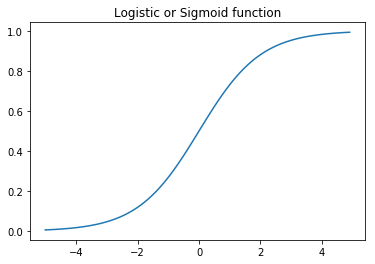

In [2]:
Xi = np.arange(-5, 5, .1)
Yi = 1 / (1 + np.exp(-Xi))
plt.title('Logistic or Sigmoid function')
plt.plot(Xi, Yi)
plt.show()

In [3]:
# The ouput values (in matrix) of logistic function using `Xjdata` as input matrix
Xj = T.fmatrix('X')
Yj = 1 / (1 + T.exp(-Xj))
F_log = th.function(inputs=[Xj], outputs=Yj)
Xjdata = [[0.0, 1.0],[-1.0, -2.0],[2.0, 3.0]]
Yjout = F_log(Xjdata)
print(Yjout)

[[ 0.5         0.7310586 ]
 [ 0.26894143  0.11920292]
 [ 0.88079703  0.95257413]]


## Demo Logistic Regresion

In [4]:
import numpy as np
import theano as th
import theano.tensor as T
import matplotlib.pyplot as plt
rnd = np.random.RandomState(123)

In [47]:
# Create a sample logistic regression problem.

# training sample size
ndata = 400 

# dimension of input variables/features (matrix 28x28 pixels or a vector 784)
features = 28 * 28

# generate a dummy datasets using random normal distribution
# wdata (weight), bdata (bias), xdata (input), ydata (output)
wdata = rnd.randn(features)
bdata = rnd.randn()

xdata = rnd.randn(ndata, features) 
ydata_ = (np.dot(xdata, wdata) + bdata) > 0.0
ydata = [1 if yd_ > 0.0 else 0 for yd_ in ydata_]

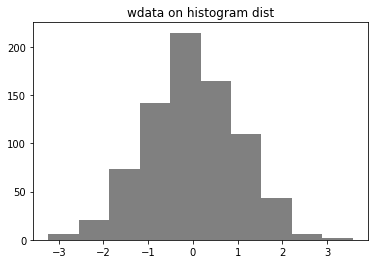

min, max, mean, num
(-3.2310550079193123, 3.5715792180263111, -0.014533377612679753, 784)
bdata: -0.661551


In [6]:
# Visualizing the weight and bias data

plt.hist(wdata, color='gray')
plt.title('wdata on histogram dist')
plt.show()
print('min, max, mean, num')
print(wdata.min(), wdata.max(), wdata.mean(), len(wdata))
print('bdata: %f' % bdata)

(400, 784)
(784,)
<type 'numpy.float64'>
-0.929711634442


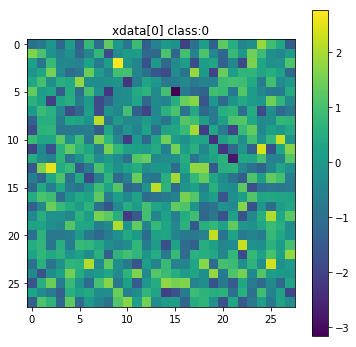

Min :-3.16705532865
Max :2.7666030711
Mean:-0.00959401533226



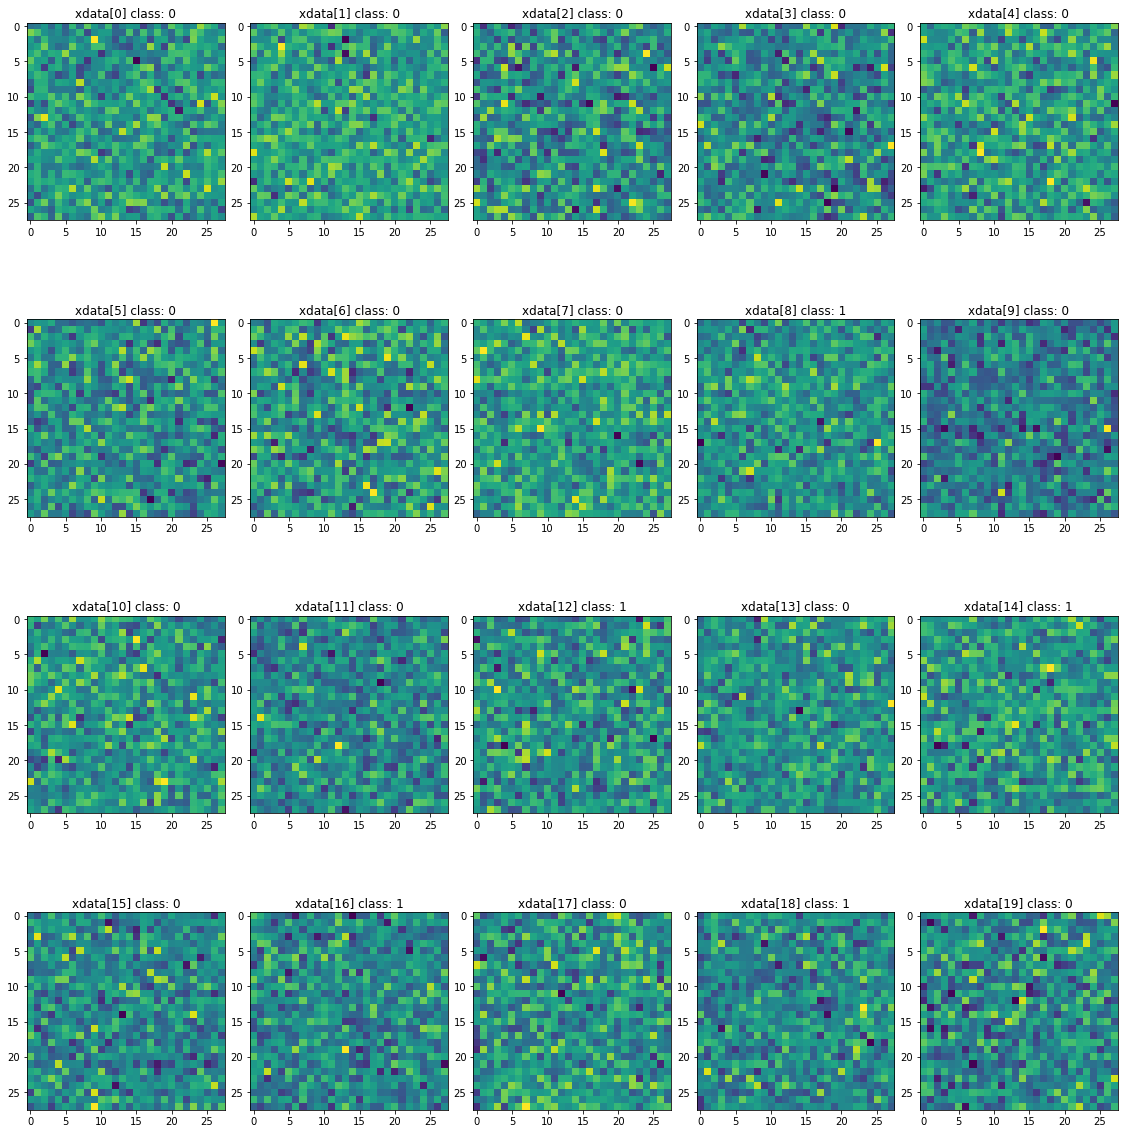

In [8]:
# Visualizing the xdata as input and ydata as target/category/class/label 

print(np.shape(xdata))
print(np.shape(xdata[0]))
print(type(xdata[0][0]))
print(xdata[0][0])

plt.figure(figsize=(6,6))
plt.imshow(np.reshape(xdata[0], (28,28)))
plt.title('xdata[0] class:' + str(ydata[0]))
plt.colorbar()
plt.show()
print('Min :' + str(xdata[0].min()))
print('Max :' + str(xdata[0].max()))
print('Mean:' + str(xdata[0].mean()))
print('')

# Plot some sample of xdata as 2D matrix (image)
fig, axis = plt.subplots(4, 5, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axis = axis.ravel()
for i in range(20):
    axis[i].imshow(np.reshape(xdata[i], (28,28)))
    axis[i].set_title('xdata['+str(i) +'] class: ' + str(ydata[i]))
plt.show()

In [35]:
# Declare Theano symbolic variables

# input var as matrix var
x = T.dmatrix('x')
# target var as vector var
y = T.dvector('y')
# weight as shared var
w = th.shared(rnd.randn(features), name='w')
# bias as shared var
b = th.shared(0., name='b')


In [36]:
print("Initial model w (weight):")
print(w.get_value())

print("Initial model b (bias):")
print(b.get_value())

Initial model w (weight):
[ -2.07818766e+00  -1.68171851e+00   1.06403101e+00  -5.76807314e-01
   2.77642817e-01  -1.28269857e-01   1.58718828e+00   1.39837561e+00
  -1.26541447e+00   5.94242553e-01   2.12450908e+00  -4.45298666e-01
  -5.22264203e-01  -1.72010685e-01   4.04228425e-01  -5.70960452e-01
  -8.13503559e-01  -3.06088303e-01  -7.30675848e-01  -5.10700152e-01
  -3.43934481e-01   6.49685115e-01   1.97347248e+00  -7.45875633e-01
   1.87391403e+00  -2.19480102e-01  -2.42971780e-01  -6.66600251e-01
   4.96643958e-01  -9.20267908e-01  -3.97956451e-01   5.70971378e-01
   6.44947885e-01   2.00491584e+00  -4.70979685e-01   1.04876809e+00
   1.47686337e+00  -1.69115847e-01  -7.52992439e-01  -2.34211811e+00
   6.66227546e-01  -2.45224692e-02   4.73930036e-01   5.13226370e-01
   1.41327473e+00   5.36542171e-01  -1.56819665e+00  -6.57469736e-01
  -2.15961902e-01  -9.56372775e-01  -1.00707185e+00   1.48178515e-01
  -2.78689506e-01  -7.93981023e-01   7.79760062e-01   7.16478015e-01
   4.292

Probability that belong to class "1" function:
$$
P(y=1|x) = h_\theta(x) = \frac{1}{1 + \exp(-\theta^\top x)} \equiv \sigma(\theta^\top x)
$$
Cost function:
$$
J(\theta) = - \frac{1}{m} \sum_i^m \left(y^{(i)} \log( h_\theta(x^{(i)}) ) + (1 - y^{(i)}) \log( 1 - h_\theta(x^{(i)}) ) \right).
$$

In [37]:
# Construct theano expression graph

# learning rate
alph = 0.1

# Probability that target = "1" using logistic/sigmoid function + bias
f_prob = 1 / (1 + T.exp(-T.dot(x, w) - b))

# Prediction thresholded (sigmoid ouput from 0 to 1, so 0.5 is the median)
f_pred = f_prob > 0.5

# Cross-entropy loss function (error function)
f_err = -((y * T.log(f_prob)) + ((1 - y) * T.log(1 - f_prob)))

# The cost function to minimize
f_cost = T.mean(f_err) # + 0.01 * (w ** 2).sum()

# Compute Gradient of cost, w & b
gw, gb = T.grad(f_cost, [w, b])

# The update step gradient of w (theta) and b (bias)
f_upd = ((w, w - (alph * gw)), (b, b - (alph * gb)))

In [41]:
# Compile the training & predict functions

f_train = th.function(inputs=[x, y], outputs=[f_pred, f_err], updates=f_upd)

f_predict = th.function(inputs=[x], outputs=f_pred)

In [50]:
# Train
epoch = 100
for i in range(epoch):
    pred, err = f_train(xdata, ydata)
    
print(i, ydata[0], pred[0], '%.4f'%err[0])

(99, 0, 0, '0.0000')


In [ ]:
# Final model the value of w (weight) and b (bias)
print(w.get_value())
print(b.get_value())

In [ ]:
# Predict the training data and print the error prediction if exist
pdata = f_predict(xdata)
for i in range(len(ydata)):
    if(ydata[i] != pdata[i]):
        print(ydata[i], pdata[i])

------------------------------------------